In [299]:
import time
import csv2md
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import open3d
from numpy import linalg as LA
import os
import h5py
import pandas as pd
from torch import nn
import math
import sys
sys.path.insert(1, 'C:/cherepashkin1/circles/finetune_test/')
from helpers import *

In [458]:
def plotori(mator, figtype='scatter'):
    fig, ax = plt.subplots(3,3, figsize=(7,7))
    for i in range(3):
        for j in range(3):
            for m in mator:
                if figtype == 'scatter':
                    ax[i,j].scatter(np.arange(36), m[:,i,j], s=3)
                elif figtype == 'line':
                    ax[i,j].plot(m[:,i,j])                    
            ax[i,j].set_ylim(-1, 1)
            if i in (0,1):   
                ax[i,j].set_xticks([])
            if j in (1,2):   
                ax[i,j].set_yticks([])
    ax[2,0].set_xlabel('angle, degrees/10')
    ax[0,0].set_ylabel('element of the matrix')
    fig.suptitle('Elements of the rotation matrix from projection matricies')
#     plt.show(fig)
    return fig

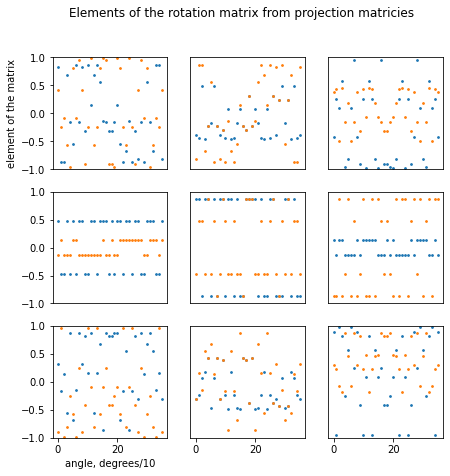

In [440]:
fig = plotori([mator4, mator5])

In [439]:
# sf(fig, 'figs')
fig.clear()
plt.close(fig)
# plt.close(fig)
# print('qq')

In [ ]:
sf(fig, 'figs')
fig.clear()
plt.close(fig)
# plt.close(fig)
print('qq')

In [371]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [372]:
%autoreload 0

In [300]:
testfun()

test


In [7]:
csvpath = 'C:/cherepashkin1/circles/finetune_test/csv'

In [8]:
df = pd.read_csv('C:/cherepashkin1/circles/finetune_test/csv/598frame.csv')

In [9]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,...,eul2,orient0,orient1,orient2,orient3,orient4,orient5,orient6,orient7,orient8
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976,164563652,...,0.523979,0.417001,-0.822757,0.386239,-0.132493,-0.475436,-0.869716,-0.899197,-0.311499,0.307267
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811,167247653,...,-2.110121,-0.396725,0.766132,-0.505620,0.047406,-0.532986,-0.844795,0.916712,0.359121,-0.175130
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825,136293591,...,-1.352440,0.238723,-0.947801,0.211387,-0.166528,-0.254412,-0.952650,-0.956703,-0.192217,0.218569
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431,128225058,...,-1.673317,0.475076,-0.874071,-0.101501,-0.161030,0.027042,-0.986579,-0.865085,-0.485045,0.127905
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806,165420434,...,-2.342986,-0.207030,0.696365,0.687178,0.282786,0.715009,-0.639371,0.936574,-0.061955,0.344950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172,86812440,...,1.273703,-0.288228,0.912054,0.291687,0.002986,-0.303757,0.952745,-0.957557,-0.275479,-0.084828
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084,171184215,...,-1.868335,-0.842404,0.470543,-0.262574,-0.021352,-0.516056,-0.856289,0.538423,0.715735,-0.444775
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856,102768458,...,-1.745811,0.765961,-0.619616,-0.171406,-0.018797,0.244920,-0.969361,-0.642613,-0.745714,-0.175952
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177,249010683,...,0.990322,-0.783147,-0.462793,0.415335,-0.116293,0.765135,0.633281,0.610865,-0.447652,0.653033


In [10]:
prmat = np.genfromtxt(os.path.join(csvpath, 'prmat.csv'), delimiter=',')
C = np.zeros([36,3,3])
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
# TODO exchange loop with vectorization with einsum
for i in range(36):
    C[i,:,:] =\
    np.matmul(np.matmul(E,prmat[4*i:4*(i+1),:]),
        np.linalg.pinv(np.matmul(E,prmat[0:4,:])))

In [11]:
angles = np.zeros([36,3])
for i in range(36):
    angles[i,:] = rot2eul(C[i])

C:/cherepashkin1/circles/finetune_test\helpers.py:401: RuntimeWarning: invalid value encountered in arcsin
  beta = -np.arcsin(R[2,0])


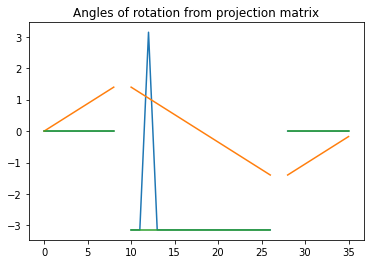

In [12]:
fig = plt.figure()
for i in range(3):
    plt.plot(angles[:,i])
plt.title('Angles of rotation from projection matrix')
sf(fig,'figs')

In [23]:
C[11,:,:]

array([[-3.42020117e-01,  2.85254832e-09,  9.39692642e-01],
       [-8.53414248e-17,  1.00000000e+00,  2.90752252e-15],
       [-9.39692617e-01, -8.10382135e-11, -3.42020135e-01]])

In [22]:
C[12,:,:]

array([[-5.00000010e-01,  1.63157123e-09,  8.66025413e-01],
       [-8.53414248e-17,  1.00000000e+00,  2.90752252e-15],
       [-8.66025388e-01,  7.63278329e-17, -5.00000000e-01]])

In [24]:
C[13,:,:]

array([[-6.42787664e-01,  7.56358309e-11,  7.66044475e-01],
       [-8.53414248e-17,  1.00000000e+00,  2.90752252e-15],
       [-7.66044465e-01, -2.16102079e-10, -6.42787643e-01]])

In [21]:
angles[12,0]

3.141592653589793

<Figure size 432x288 with 0 Axes>

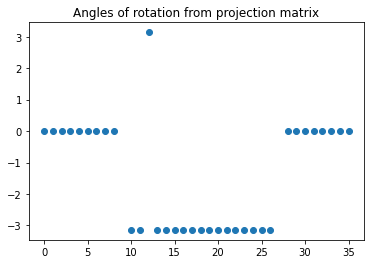

In [16]:
fig = plt.figure()
for i in range(1):
    fig = plt.figure()
    plt.scatter(np.arange(36), angles[:,i])
plt.title('Angles of rotation from projection matrix')
sf(fig,'figs')

In [9]:
C[1]

array([[ 9.84807769e-01,  2.26906289e-11,  1.73648173e-01],
       [-8.53414248e-17,  1.00000000e+00,  2.90752252e-15],
       [-1.73648185e-01,  8.75213714e-10,  9.84807739e-01]])

In [2]:
os.getcwd()

'C:\\cherepashkin1\\circles\\notebooks'

In [274]:
def rotplot(C):
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    for i in range(3):
        for j in range(3):
            ax[i][j].plot(C[:,i,j])
    ax[0,0].set_xlabel('angle, degrees/10')
    ax[0,0].set_ylabel('element of the matrix')
    fig.suptitle('Elements of the rotation matrix from projection matricies')
    sf(fig, 'figs')

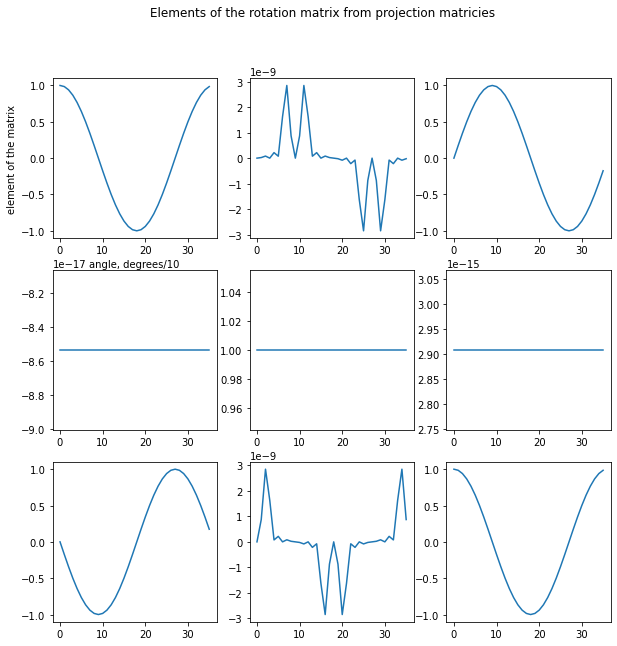

In [275]:
rotplot(C)

In [196]:
betta = np.array([np.arccos(C[i,0,0]) for i in range(36)])


<ipython-input-196-69cf42f44ef0>:1: RuntimeWarning: invalid value encountered in arccos
  betta = np.array([np.arccos(C[i,0,0]) for i in range(36)])


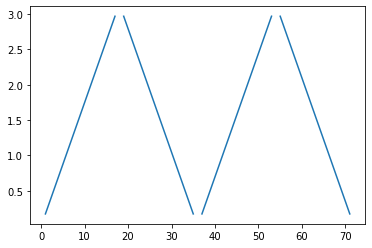

In [197]:
plt.plot(np.hstack((betta, betta)))

In [198]:
betta[0] = 0
betta[-1] = betta[1]
betta[18] = math.pi

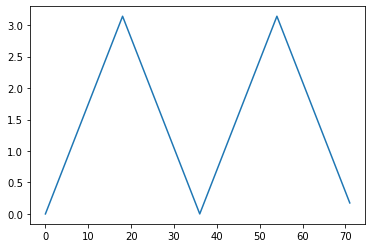

In [199]:
plt.plot(np.hstack((betta, betta)))

In [ ]:
betta[-1] = betta[1]
betta[0] = math.pi/2
betta[18] = -math.pi/2

In [90]:
betta[18]

nan

In [48]:
betta.shape

(36,)

In [139]:
betta[9]

-3.8163916471489756e-17

In [84]:
math.pi/2

1.5707963267948966

In [83]:
betta[0]

1.5707963267948966

In [55]:
betta[1]

1.3962634909525062

In [58]:
math.pi/2

1.5707963267948966

In [59]:
betta[0] = math.pi/2

In [64]:
betta[-1] = (35/36)*math.pi/2

In [66]:
betta[-2]

1.2217305928520148

In [67]:
betta[-3]

1.0471975328172065

In [72]:
(betta[-2]-betta[-3])*math.pi*36

19.739224051700404

In [73]:
betta[-1] = 2*betta[-2]-betta[-3]

In [75]:
betta[35]

1.396263652886823

In [81]:
betta[18] = -betta[0]

In [87]:
betta[1]-betta[-1]

-1.6193431684463633e-07

In [86]:
betta[-1]

1.396263652886823

In [96]:
ori = df.loc[:,['orient' + str(i) for i in range(9)]].values

In [106]:
eul = df.loc[:,['eul' + str(i) for i in range(3)]].values

In [97]:
ori.shape

(5283, 9)

In [98]:
ori2= ori.reshape([-1,3,3])

In [99]:
ori2.shape

(5283, 3, 3)

In [101]:
ori3 = np.matmul(C[35,:,:], ori2[10,:,:])

In [105]:
## eul for angle 35 from rotated ori

In [102]:
rot2eul(ori3)

array([ 0.35059108, -1.51814828,  1.8709898 ])

In [ ]:
## eul for angle 35 from

In [104]:
rot2eul(ori2[10,:,:])

array([-1.2169107 , -1.40414256,  0.30788637])

In [129]:
rot2eul(ori2[10,:,:])+[math.pi/2, -math.pi/2, math.pi/2]+[0, betta[35], 0]

array([ 0.35388563, -1.5786754 ,  1.8786827 ])

In [107]:
np.sum(eul)

-4923.241864733999

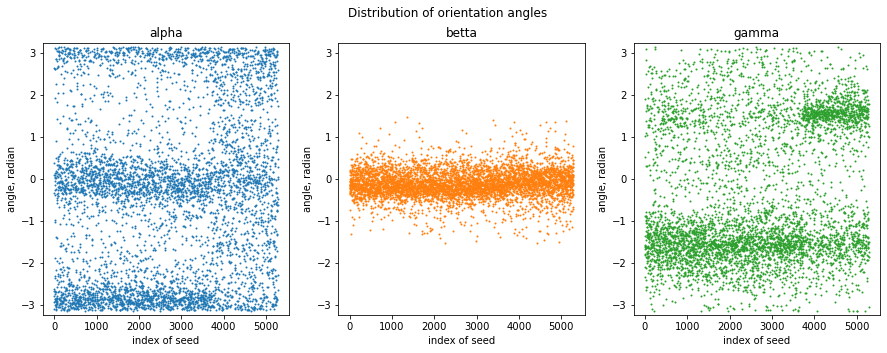

In [124]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
angel = ['alpha', 'betta', 'gamma']
for i in range(3):
    ax[i].scatter(np.arange(5283),eul[:,i], s=1, c=colors[i])
    ax[i].set_title(angel[i])
    ax[i].set_xlabel('index of seed')
    ax[i].set_ylabel('angle, radian')
    ax[i].set_ylim(-math.pi-0.1, math.pi+0.1)
fig.suptitle('Distribution of orientation angles')
sf(fig, 'figs')

### TODO check that multiplication of rotation matrix C on orientation matrix will give the same result, as multiplication of C by point cloud. 

In [227]:
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply').points)
pcd0 = pcd - np.mean(pcd, axis=0)

In [228]:
pcd.shape

(29212, 3)

In [229]:
np.mean(pcd0, axis=0)

array([ 1.04823685e-12,  3.61585790e-13, -5.59889968e-12])

In [230]:
C[9,:,:]

array([[-3.81639165e-17,  2.42861287e-17,  1.00000000e+00],
       [-8.53414248e-17,  1.00000000e+00,  2.90752252e-15],
       [-1.00000000e+00,  1.02260204e-16,  8.09596912e-17]])

In [231]:
pcd1 = np.matmul(pcd0, C[5,:,:].T)

In [232]:
pcd1.shape

(29212, 3)

In [233]:
pcd0.shape

(29212, 3)

(<Figure size 720x720 with 1 Axes>, <Axes3DSubplot:>)

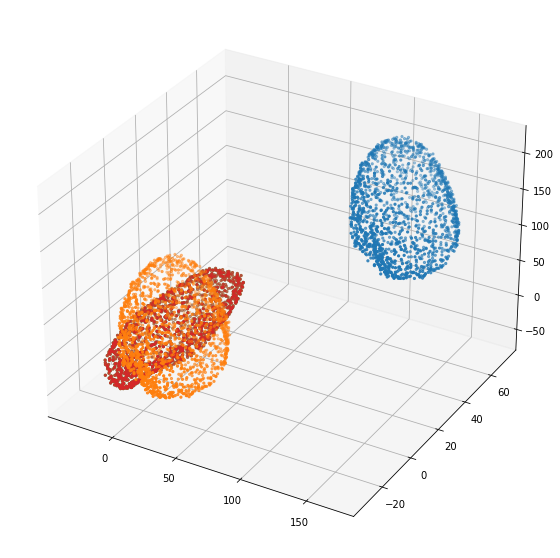

In [241]:
ds = 20
viewpoints([pcd[::ds,:],pcd0[::ds,:],pcd1[::ds,:], pcd3[::ds,:]])

In [238]:
pcd2 = np.matmul(pcd, C[5,:,:].T)
pcd3 = pcd2 - np.mean(pcd2, axis=0)

(<Figure size 720x720 with 1 Axes>, <Axes3DSubplot:>)

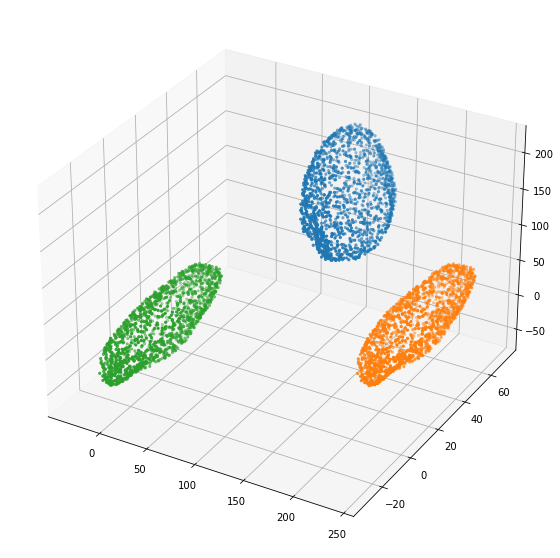

In [239]:
ds = 20
viewpoints([pcd[::ds,:],pcd2[::ds,:],pcd3[::ds,:]])

Multiplication on rotation matrix does not depend, where do I do it, before subtracting the mean or after that

### Calculate straight pcd to eul

In [246]:
np.matmul(C[9,:,:], LA.eig(pose6tomat(moments(pcd0)))[1].T)
#+2*math.pi*np.array([1,0,1])

array([[ 0.38623888, -0.86971621,  0.30726737],
       [-0.82275715, -0.47543578, -0.31149877],
       [-0.41700143,  0.13249349,  0.89919702]])

In [245]:
np.matmul(LA.eig(pose6tomat(moments(pcd0)))[1], C[9,:,:].T)
#+2*math.pi*np.array([1,0,1])

array([[ 0.38623888, -0.82275715, -0.41700143],
       [-0.86971621, -0.47543578,  0.13249349],
       [ 0.30726737, -0.31149877,  0.89919702]])

In [214]:
LA.eig(pose6tomat(moments(np.matmul(pcd0, C[9,:,:].T))))[1]
#+2*math.pi*np.array([1,0,1])

array([[-0.89919702, -0.30726737, -0.31149877],
       [-0.13249349,  0.86971621, -0.47543578],
       [-0.41700143,  0.38623888,  0.82275715]])

Here you can see that it is not the same, to rotate point cloud first and calculate orientation matrix, or first calculate orientation matrix and then rotate it

### Compare eul angles for angle 9 for multiplication pcd on rotation matrix and for adding values to the eul angles

In [209]:
betta[35]

0.17453283584239035

In [204]:
rot2eul(C[-1,:,:])

array([ 8.88715274e-10, -1.74532937e-01, -8.66579571e-17])

In [208]:
rot2eul(C[-1,:,:])+rot2eul(LA.eig(pose6tomat(moments(pcd0)))[1])

array([-0.79223651,  0.9433979 , -0.30764163])

In [206]:
rot2eul(np.matmul(C[-1,:,:], LA.eig(pose6tomat(moments(pcd0)))[1]))

array([-0.88269425,  0.94950013, -0.22962975])

## check moments

In [252]:
pose6tomat(moments(pcd0))

array([[ 11682431.39148296,  -2072327.49637135, -10192441.5262221 ],
       [ -2072327.49637135,   8333248.33205532,   2867904.95892099],
       [-10192441.5262221 ,   2867904.95892099,  29169936.10817471]])

In [253]:
np.matmul(C[5,:,:], pose6tomat(moments(pcd0)))

array([[  -298541.47815271,    864876.33086769,  15793893.36359837],
       [ -2072327.49637138,   8333248.33205533,   2867904.95892108],
       [-15500836.61331685,   3430948.74468837,  26557937.23483433]])

In [255]:
pose6tomat(moments(np.matmul(pcd0, C[5,:,:].T)))

array([[11906925.99084897,   864876.33086774, 10380815.51791982],
       [  864876.33086774,  8333248.33205534,  3430948.74468845],
       [10380815.51791982,  3430948.74468845, 28945442.96544351]])

moments are nonlinear that's why they are not invariant against rotation. 
That means I should calculate orientation angle of rotated point cloud from scratch for every angle of rotation

# Calculate rotation matrix and eul for all rotation angles

In [258]:
cip = namelist('C:/cherepashkin1/phenoseed/598', 'Surface.ply')

In [259]:
len(cip)

5283

In [260]:
mator2 = np.zeros([5283, 36, 3, 3])
rotangles = np.zeros([5283, 36, 3])

In [267]:
st = time.time()
for i in range(5283):
    pcd0 = np.asarray(open3d.io.read_point_cloud(cip[i]).points)
    for j in range(36):
#         pcd0 = pcd - np.mean(pcd, axis=0)
#         pcd1 = np.matmul(pcd0, C[j,:,:].T)
#         LA.eig(pose6tomat(moments(pcd0)))[1].T
#         np.matmul(C[9,:,:], LA.eig(pose6tomat(moments(pcd0)))[1].T)
        pcd1 = pcd0-np.mean(pcd0,axis=0)
        pcd2 = np.matmul(pcd1, C[j,:,:].T)
        w1, v1 = LA.eig(pose6tomat(moments(pcd2)))
#         w1, v1 = LA.eig(pose6tomat(moments(np.matmul((pcd0-np.mean(pcd0,axis=0)), C[j,:,:].T))))
        mator = v1[:,np.argsort(w1)]
        mator2[i,j,:,:] = LA.det(mator)*mator
        rotangles[i,j,:] = rot2eul(mator2[i,j,:,:])
ft = time.time()
print('ellapsed time = {} s'.format(ft - st))

ellapsed time = 203.75695610046387 s


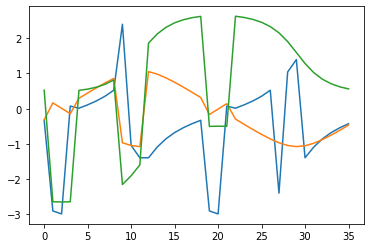

In [269]:
for i in range(3):
    plt.plot(rotangles[0,:,i])

Text(0.5, 0.98, 'Distribution of orientation angles')

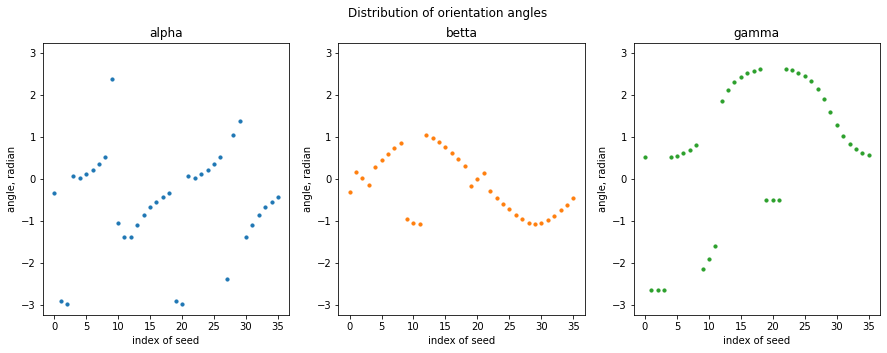

In [271]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
angel = ['alpha', 'betta', 'gamma']
for i in range(3):
    ax[i].scatter(np.arange(36), rotangles[0,:,i], s=10, c=colors[i])
    ax[i].set_title(angel[i])
#     ax[i].set_xlabel('index of seed')
#     ax[i].set_ylabel('angle, radian')
    ax[i].set_ylim(-math.pi-0.1, math.pi+0.1)
# fig.suptitle('Distribution of orientation angles')
# sf(fig, 'figs')

In [276]:
mator2.shape

(5283, 36, 3, 3)

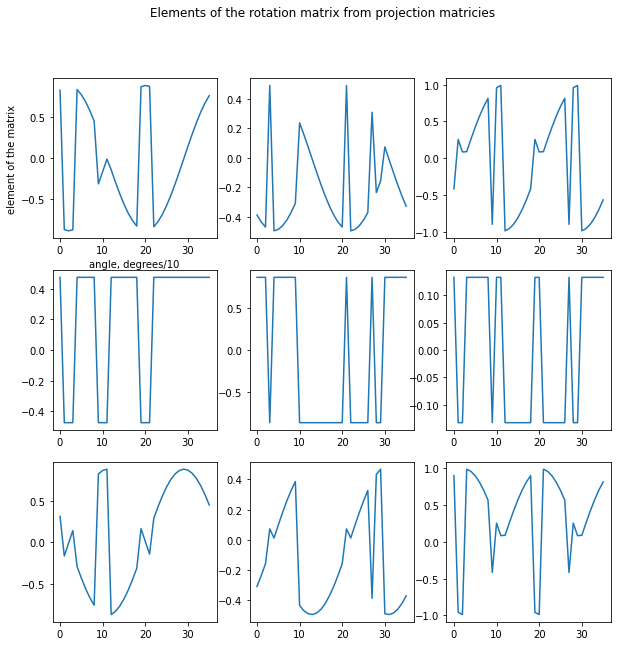

In [278]:
rotplot(mator2[0,:,:,:])

## check orientation matrix accross different rotation angles without ordering of eigenvalues

In [363]:
from helpers import *

In [279]:
mator3 = np.zeros([5283, 36, 3, 3])
rotangles3 = np.zeros([5283, 36, 3])

In [345]:
def getOri(pcd0, C, eigsort=True):
    mator1 = np.zeros([36,3,3])
    rotangles = np.zeros([36,3])
    for j in range(36):
        pcd1 = pcd0-np.mean(pcd0,axis=0)
        pcd2 = np.matmul(pcd1, C[j,:,:].T)
        w, v = LA.eig(pose6tomat(moments(pcd2)))
        if eigsort:
            mator0 = v[:,np.argsort(w)]
            mator1[j,:,:] = LA.det(mator0)*mator0
        else:
            mator1[j,:,:] = v
        rotangles[j,:] = rot2eul(mator1[j,:,:])        
    return mator1, rotangles

In [347]:
mator4.shape

(36, 3, 3)

In [348]:
mator4[0,:,:]

array([[ 0.82275715, -0.38623888, -0.41700143],
       [ 0.47543578,  0.86971621,  0.13249349],
       [ 0.31149877, -0.30726737,  0.89919702]])

In [349]:
fig

<Figure size 576x576 with 0 Axes>

In [418]:
cip = namelist('C:/cherepashkin1/phenoseed/598', 'Surface.ply')

In [419]:
prmat = np.genfromtxt(os.path.join(csvpath, 'prmat.csv'), delimiter=',')
C = np.zeros([36,3,3])
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
# TODO exchange loop with vectorization with einsum
for i in range(36):
    C[i,:,:] =\
    np.matmul(np.matmul(E,prmat[4*i:4*(i+1),:]),
        np.linalg.pinv(np.matmul(E,prmat[0:4,:])))

In [359]:
C2 = np.swapaxes(C, 1, 2)

In [399]:
from helpers import *

In [400]:
fig

<Figure size 504x504 with 0 Axes>

In [414]:
def getOri(pcd, C, eigsort=True):
    print('439')
    mator1 = np.zeros([36,3,3])
    rotangles = np.zeros([36,3])
    for j in range(36):
        pcd = np.matmul(pcd, C[j,:,:].T)
        pcd = pcd-np.mean(pcd,axis=0)
        w, v = LA.eig(pose6tomat(moments(pcd)))
        if eigsort:
            mator0 = v[:,np.argsort(w)]
#             print(448, round(LA.det(mator0)))
            mator1[j,:,:] = round(LA.det(mator0))*mator0
        else:
            mator1[j,:,:] = v
        rotangles[j,:] = rot2eul(mator1[j,:,:])
    return mator1, rotangles

In [415]:
for i in range(1):
    pcd0 = np.asarray(open3d.io.read_point_cloud(cip[i]).points)
    mator4, rotangles4 = getOri(pcd0, C, eigsort=True)
    mator5, rotangles5 = getOri(pcd0, C, eigsort=False)

439
439


In [413]:
mator4.shape

(36, 3, 3)

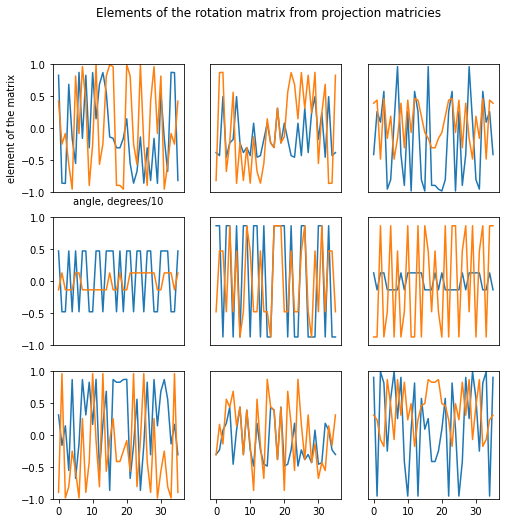

qq


In [416]:
fig, ax = plt.subplots(3,3, figsize=(8,8))
for i in range(3):
    for j in range(3):
        ax[i][j].plot(mator4[:,i,j])
        ax[i][j].plot(mator5[:,i,j])
        ax[i,j].set_ylim(-1, 1)
        if i in (0,1):   
            ax[i,j].set_xticks([])
        if j in (1,2):   
            ax[i,j].set_yticks([])
ax[0,0].set_xlabel('angle, degrees/10')
ax[0,0].set_ylabel('element of the matrix')
fig.suptitle('Elements of the rotation matrix from projection matricies')
plt.show(fig)
fig.clear()
plt.close(fig)
# plt.close(fig)
print('qq')

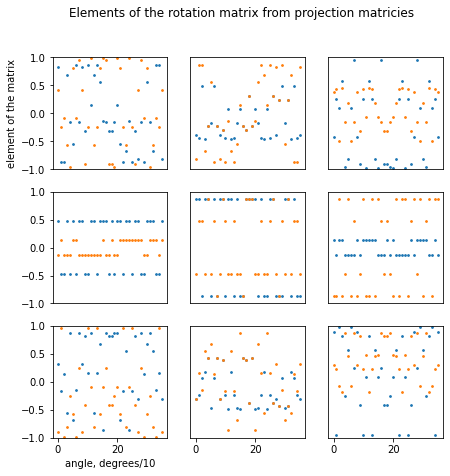

qq


In [417]:
fig, ax = plt.subplots(3,3, figsize=(7,7))
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(np.arange(36), mator4[:,i,j], s=3)
        ax[i,j].scatter(np.arange(36), mator5[:,i,j], s=3)
        ax[i,j].set_ylim(-1, 1)
        if i in (0,1):   
            ax[i,j].set_xticks([])
        if j in (1,2):   
            ax[i,j].set_yticks([])
ax[2,0].set_xlabel('angle, degrees/10')
ax[0,0].set_ylabel('element of the matrix')
fig.suptitle('Elements of the rotation matrix from projection matricies')
plt.show(fig)
sf(fig, 'figs')
fig.clear()
plt.close(fig)
# plt.close(fig)
print('qq')

In [342]:
fig

<Figure size 576x576 with 0 Axes>

In [331]:
plt.close()

In [333]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [337]:
plt.fig().close()

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

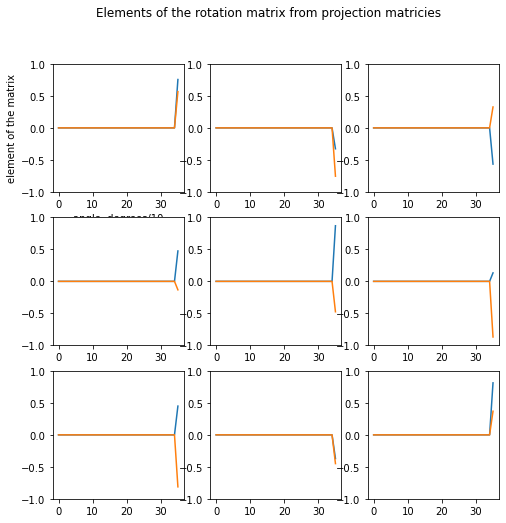

In [338]:
fig

In [339]:
fig.clear()
plt.close(fig)

In [340]:
fig

<Figure size 576x576 with 0 Axes>

In [385]:
a = np.array([[3, -2, 6],
[-2, 6, 3],
[6, 3, -2]])

In [386]:
LA.eig(a)

(array([ 7., -7.,  7.]),
 array([[ 0.84515425, -0.53452248,  0.19797221],
        [-0.16903085, -0.26726124,  0.88269446],
        [ 0.50709255,  0.80178373,  0.42621296]]))

In [387]:
b = np.array([[1, 0, 2],
 [-2, 3, 1],
 [0, 1, -3]])

In [388]:
LA.det(b)

-14.000000000000004

In [389]:
b/14

array([[ 0.07142857,  0.        ,  0.14285714],
       [-0.14285714,  0.21428571,  0.07142857],
       [ 0.        ,  0.07142857, -0.21428571]])

In [392]:
c = np.array([[10, -2,6],[-2,13,3],[6,3,5]])

In [393]:
LA.solve(c,np.array([0,0,0]))

array([ 0.,  0., -0.])

# 24_01

In [418]:
cip = namelist('C:/cherepashkin1/phenoseed/598', 'Surface.ply')

In [421]:
prmat = np.genfromtxt(os.path.join(csvpath, 'prmat.csv'), delimiter=',')
C = np.zeros([36,3,3])
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
# TODO exchange loop with vectorization with einsum
for i in range(36):
    C[i,:,:] =\
    np.matmul(np.matmul(E,prmat[4*i:4*(i+1),:]),
        np.linalg.pinv(np.matmul(E,prmat[0:4,:])))

In [422]:
pcd0 = np.asarray(open3d.io.read_point_cloud(cip[0]).points)

In [426]:
pcd1 = pcd0 - np.mean(pcd0, axis=0)
pcd2 = np.matmul(pcd1, C[5,:,:])

(<Figure size 720x720 with 1 Axes>, <Axes3DSubplot:>)

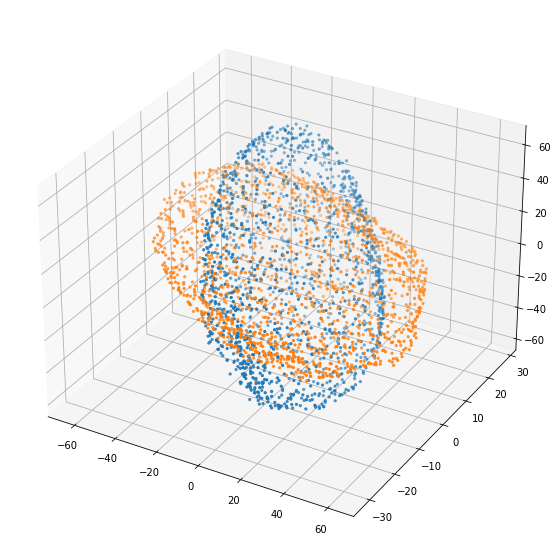

In [428]:
ds = 20
viewpoints([pcd1[::ds,:], pcd2[::ds,:]])

In [429]:
C.shape

(36, 3, 3)

In [430]:
C2 = np.swapaxes(C, 1, 2)

In [399]:
from helpers import *

In [400]:
fig

<Figure size 504x504 with 0 Axes>

In [414]:
def getOri(pcd, C, eigsort=True):
    print('439')
    mator1 = np.zeros([36,3,3])
    rotangles = np.zeros([36,3])
    for j in range(36):
        pcd = np.matmul(pcd, C[j,:,:])
        pcd = pcd-np.mean(pcd,axis=0)
        w, v = LA.eig(pose6tomat(moments(pcd)))
        if eigsort:
            mator0 = v[:,np.argsort(w)]
#             print(448, round(LA.det(mator0)))
            mator1[j,:,:] = round(LA.det(mator0))*mator0
        else:
            mator1[j,:,:] = v
        rotangles[j,:] = rot2eul(mator1[j,:,:])
    return mator1, rotangles

In [431]:
# for i in range(1):
pcd0 = np.asarray(open3d.io.read_point_cloud(cip[0]).points)
mator4, rotangles4 = getOri(pcd0, C, eigsort=True)
mator5, rotangles5 = getOri(pcd0, C, eigsort=False)

439
439


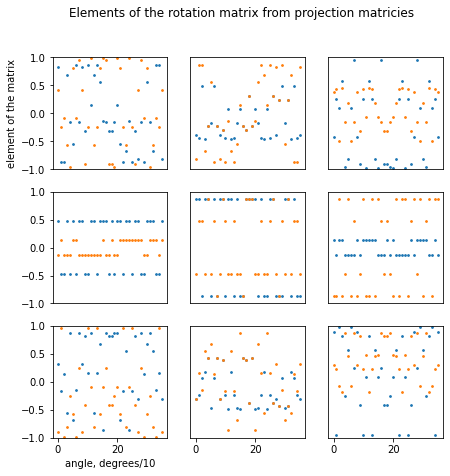

qq


In [432]:
fig, ax = plt.subplots(3,3, figsize=(7,7))
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(np.arange(36), mator4[:,i,j], s=3)
        ax[i,j].scatter(np.arange(36), mator5[:,i,j], s=3)
        ax[i,j].set_ylim(-1, 1)
        if i in (0,1):   
            ax[i,j].set_xticks([])
        if j in (1,2):   
            ax[i,j].set_yticks([])
ax[2,0].set_xlabel('angle, degrees/10')
ax[0,0].set_ylabel('element of the matrix')
fig.suptitle('Elements of the rotation matrix from projection matricies')
plt.show(fig)
sf(fig, 'figs')
fig.clear()
plt.close(fig)
# plt.close(fig)
print('qq')

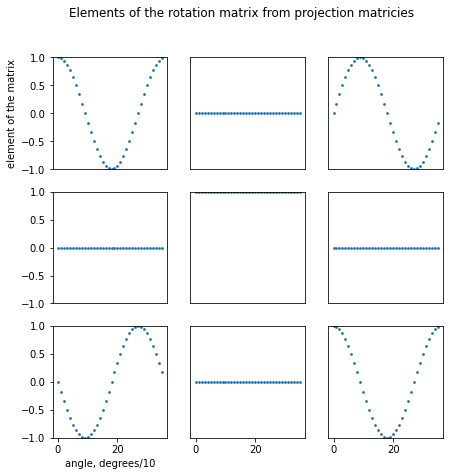

qq


In [434]:
fig, ax = plt.subplots(3,3, figsize=(7,7))
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(np.arange(36), C[:,i,j], s=3)
        ax[i,j].set_ylim(-1, 1)
        if i in (0,1):   
            ax[i,j].set_xticks([])
        if j in (1,2):   
            ax[i,j].set_yticks([])
ax[2,0].set_xlabel('angle, degrees/10')
ax[0,0].set_ylabel('element of the matrix')
fig.suptitle('Elements of the rotation matrix from projection matricies')
plt.show(fig)
# sf(fig, 'figs')
fig.clear()
plt.close(fig)
# plt.close(fig)
print('qq')

In [488]:
pcd0.shape

(29212, 3)

In [500]:
print('439')
eigsort = True
mator1 = np.zeros([36,3,3])
wa1 = np.zeros([36,3])
va1 = np.zeros([36, 3, 3])
or1 = np.zeros([36,3,3])
pcda = np.zeros([36,29212,3])
for j in range(36):
    pcd1 = np.matmul(pcd0, C[j,:,:])
    pcd2 = pcd1-np.mean(pcd1,axis=0)
    w, v = LA.eig(pose6tomat(moments(pcd2)))
    if eigsort:
        mator0 = v[:,np.argsort(w.T)]
        mator1[j,:,:] = round(LA.det(mator0))*mator0
    else:
        mator1[j,:,:] = v
#     print(round(LA.det(mator1[j,:,:])))
    pcd3 = np.matmul(pcd2,mator1[j,:,:])
    pcda[j] = pcd3
    or1[j,:,:] = pose6tomat(moments(pcd3))
#     viewpoints([pcd3[::20,:]])
#     w1, v1 = LA.eig(pose6tomat(moments(pcd1)))
#     wa1[j,:] = w1
#     va1[j,:,:]=v1
#     print(w1)

439
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
for i in range(36):
    print(i)
    viewpoints([pcda[0,::20,:],pcda[i,::20,:]])

In [503]:
or2 = np.zeros([36,3,3])

In [504]:
for i in range(36):
    or2[i,:,:] = pose6tomat(moments(pcda[i,:,:]))

In [484]:
va1[5,:,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [485]:
or1[0,:,:]

array([[ 6.62602849e+06,  1.22345227e-08,  2.00234354e-08],
       [ 1.22345227e-08,  8.24034427e+06, -1.76951289e-08],
       [ 2.00234354e-08, -1.76951289e-08,  3.43192431e+07]])

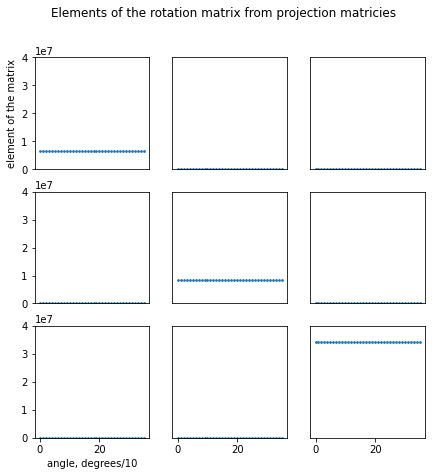

qq


In [505]:
fig, ax = plt.subplots(3,3, figsize=(7,7))
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(np.arange(36), or2[:,i,j], s=3)
        ax[i,j].set_ylim(0, 4e7)
        if i in (0,1):   
            ax[i,j].set_xticks([])
        if j in (1,2):   
            ax[i,j].set_yticks([])
ax[2,0].set_xlabel('angle, degrees/10')
ax[0,0].set_ylabel('element of the matrix')
fig.suptitle('Elements of the rotation matrix from projection matricies')
plt.show(fig)
# sf(fig, 'figs')
fig.clear()
plt.close(fig)
# plt.close(fig)
print('qq')

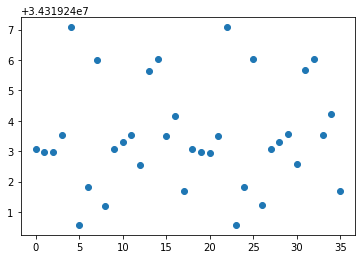

In [454]:
plt.scatter(np.arange(36), wa1[:,0])

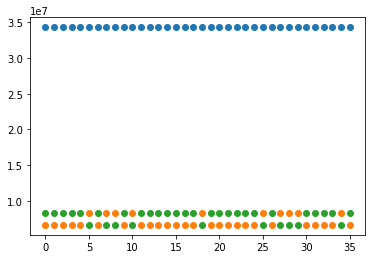

In [450]:
for i in range(3):
    plt.scatter(np.arange(36), wa1[:,i])

# Multiple on rotation in the end

In [538]:
LA.inv(C[5].T).T

array([[ 6.42787639e-01,  1.16926229e-10, -7.66044470e-01],
       [-2.17243492e-15,  1.00000000e+00, -1.93429474e-15],
       [ 7.66044395e-01, -1.96848141e-10,  6.42787596e-01]])

In [539]:
LA.inv(C[5])

array([[ 6.42787639e-01,  1.16926229e-10, -7.66044470e-01],
       [-2.17243492e-15,  1.00000000e+00, -1.93429474e-15],
       [ 7.66044395e-01, -1.96848141e-10,  6.42787596e-01]])

439
[[ 6.62602849e+06 -2.29010766e-08  3.72529030e-09]
 [-2.29010766e-08  8.24034427e+06 -4.54019755e-09]
 [ 3.72529030e-09 -4.54019755e-09  3.43192431e+07]]


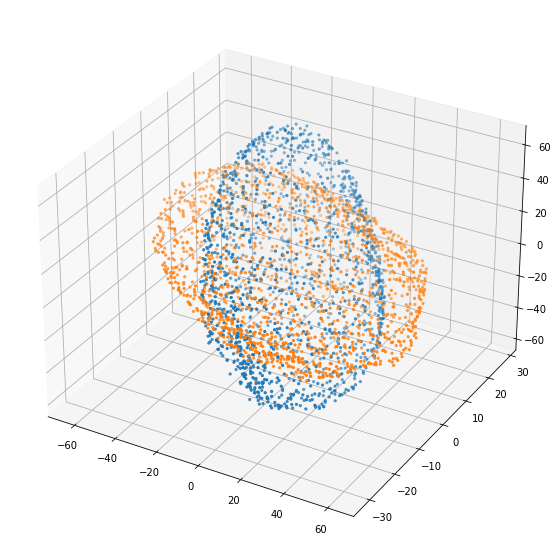

In [540]:
print('439')
eigsort = True
# mator1 = np.zeros([36,3,3])
# wa1 = np.zeros([36,3])
# va1 = np.zeros([36, 3, 3])
or1, or2 = [np.zeros([36,3,3]),]*2
pcda = np.zeros([36,29212,3])
pcdb = np.zeros([36,29212,3])
# for j in range(36):
pcd1 = np.asarray(open3d.io.read_point_cloud(cip[0]).points)
# pcd1 = np.matmul(pcd0, C[j,:,:])
pcd2 = pcd1-np.mean(pcd1,axis=0)
w, v = LA.eig(pose6tomat(moments(pcd2)))
# if eigsort:

# else:
#     mator1[j,:,:] = v
mator0 = v[:,np.argsort(w.T)]
mator1 = round(LA.det(mator0))*mator0
#     print(round(LA.det(mator1[j,:,:])))
pcd3 = np.matmul(pcd2,mator1)

pcd4 = np.matmul(pcd2, C[5])
viewpoints([pcd2[::20,:], pcd4[::20,:]])
pcd5 = np.matmul(pcd4, np.matmul(LA.inv(C[5]), mator1))

print(pose6tomat(moments(pcd5)))
# pcda[0] = pcd3
# # or1[j,:,:] = pose6tomat(moments(pcd3))
# or1[0,:,:] = mator1
# for i in range(1,36):
#     pcda[i] = np.matmul(pcd2, C[i])
# #     pcda[i] = np.matmul()    
#     or1[i] = np.matmul(mator1, LA.inv(C[i].T))
#     pcdb[i] = np.matmul(pcda[i], or1[i].T)
#     or2[i] = pose6tomat(moments(pcdb[i]))
#     pcdc[i] = np.matmul()
#     viewpoints([pcdb[i,::20,:]])

    
#     viewpoints([pcd3[::20,:]])
#     w1, v1 = LA.eig(pose6tomat(moments(pcd1)))
#     wa1[j,:] = w1
#     va1[j,:,:]=v1
#     print(w1)

In [518]:
or2[1]

array([[ 23458486.19782331,  -1220697.6665579 , -13026676.72679891],
       [ -1220697.6665579 ,   7119142.06594433,     67800.5341279 ],
       [-13026676.72679891,     67800.5341279 ,  18607987.56794535]])

In [527]:
np.mean(pcd3-pcdb[3])

-3.9851883413300975e-15

(<Figure size 720x720 with 1 Axes>, <Axes3DSubplot:>)

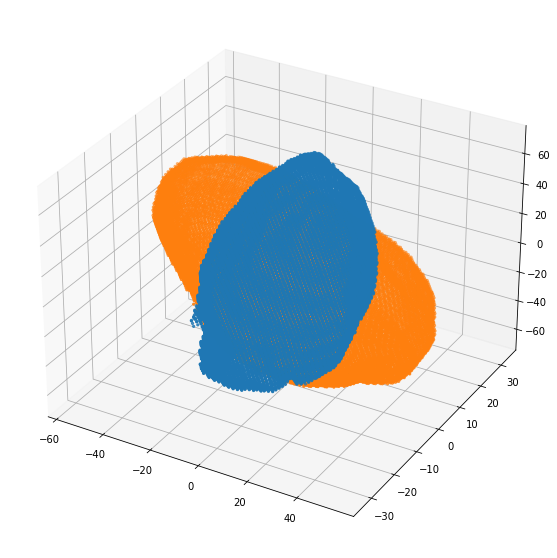

In [528]:
viewpoints([pcd3,pcdb[1]])

In [514]:
np.std(pcdb[1]-pcdb[2])

4.708065874331432e-15

# Check nan when calculate eul 

In [541]:
df = pd.read_csv('C:/cherepashkin1/circles/finetune_test/csv/598frame.csv')

In [542]:
orients = df.loc[:,['orient' + str(i) for i in range(9)]].values
GTw0 = np.einsum('ijk,nkm->nijm', LA.inv(C),
                 orients.reshape([-1,3,3]))
GTw = np.zeros([GTw0.shape[0],GTw0.shape[1],3])

In [543]:
for i in range(GTw0.shape[0]):
    for j in range(GTw0.shape[1]):
        #TODO deal with case when there is arcsin error
        GTw[i,j,:] = rot2eul(GTw0[i,j])

C:/cherepashkin1/circles/finetune_test\helpers.py:403: RuntimeWarning: invalid value encountered in arcsin
  beta = -np.arcsin(R[2,0])


In [549]:
GTw.shape

(5283, 36, 3)

In [548]:
np.where(np.isnan(GTw))

(array([ 203,  203,  203,  203,  203,  203, 1333, 1333, 1333, 1333, 1333,
        1333, 1954, 1954, 1954, 1954, 1954, 1954, 3614, 3614, 3614, 3614,
        3614, 3614, 4072, 4072, 4072, 4072, 4072, 4072, 4813, 4813, 4813,
        4813, 4813, 4813, 4912, 4912, 4912, 4912, 4912, 4912, 4995, 4995,
        4995, 4995, 4995, 4995, 4996, 4996, 4996, 4996, 4996, 4996, 5193,
        5193, 5193, 5193, 5193, 5193], dtype=int64),
 array([ 9,  9,  9, 27, 27, 27,  9,  9,  9, 27, 27, 27,  9,  9,  9, 27, 27,
        27,  9,  9,  9, 27, 27, 27,  9,  9,  9, 27, 27, 27,  9,  9,  9, 27,
        27, 27,  9,  9,  9, 27, 27, 27,  9,  9,  9, 27, 27, 27,  9,  9,  9,
        27, 27, 27,  9,  9,  9, 27, 27, 27], dtype=int64),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
        2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2], dtype=int64))

In [551]:
GTw0.shape

(5283, 36, 3, 3)

In [556]:
R = GTw0[203,9,:]

In [558]:
R[2,0]

1.0000000000000002

In [562]:
print(R[2,0])
beta = -np.arcsin(R[2,0])
alpha = np.arctan2(R[2,1]/np.cos(beta),R[2,2]/np.cos(beta))
gamma = np.arctan2(R[1,0]/np.cos(beta),R[0,0]/np.cos(beta))

1.0000000000000002


<ipython-input-562-439a1be49aa5>:2: RuntimeWarning: invalid value encountered in arcsin
  beta = -np.arcsin(R[2,0])


In [552]:
rot2eul(GTw0[203,9,:])

array([nan, nan, nan])

In [563]:
-np.arcsin(R[2,0])

<ipython-input-563-414a58f4a246>:1: RuntimeWarning: invalid value encountered in arcsin
  -np.arcsin(R[2,0])


nan

In [572]:
np.arcsin(1.00000001)

<ipython-input-572-9148c55dbc46>:1: RuntimeWarning: invalid value encountered in arcsin
  np.arcsin(1.00000001)


nan

In [564]:
R[2,0]

1.0000000000000002

### Calculate straight pcd to eul

In [575]:
np.matmul(C[9,:,:], LA.eig(pose6tomat(moments(pcd0)))[1])
#+2*math.pi*np.array([1,0,1])

array([[ 0.75331834, -0.6272117 ,  0.19778009],
       [ 0.2129065 , -0.05195336, -0.97569036],
       [-0.62223975, -0.7771141 , -0.09440003]])

In [574]:
np.matmul(LA.eig(pose6tomat(moments(pcd0)))[1], C[9,:,:])
#+2*math.pi*np.array([1,0,1])

array([[-0.09440003,  0.7771141 ,  0.62223975],
       [ 0.97569036, -0.05195336,  0.2129065 ],
       [-0.19778009, -0.6272117 ,  0.75331834]])

In [573]:
LA.eig(pose6tomat(moments(np.matmul(pcd0, C[9,:,:]))))[1]
#+2*math.pi*np.array([1,0,1])

array([[-0.75331834,  0.6272117 , -0.19778009],
       [ 0.2129065 , -0.05195336, -0.97569036],
       [ 0.62223975,  0.7771141 ,  0.09440003]])

# Check if orientation matrix is orthogonal

In [576]:
orient.shape

(5283, 9)

In [577]:
or3 = orient.reshape([-1,3,3])

In [578]:
or3[0]

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [581]:
or3[0].T

array([[ 0.41700143, -0.13249349, -0.89919702],
       [-0.82275715, -0.47543578, -0.31149877],
       [ 0.38623888, -0.86971621,  0.30726737]])

In [580]:
LA.inv(or3[0])

array([[ 0.41700143, -0.13249349, -0.89919702],
       [-0.82275715, -0.47543578, -0.31149877],
       [ 0.38623888, -0.86971621,  0.30726737]])

In [ ]:
# Check distribution of orient values

In [ ]:

df = pd.read_csv('C:/cherepashkin1/circles/finetune_test/csv/598frame.csv')